# Normalization of stellar spectra

In the backend, *ASTRA* can call different tools to normalize the stellar spectra before any further processing stages.


The current version of ASTRA supports different avenues to do this:

1) [SNT](https://github.com/iastro-pt/Spectra-Normalization-Tool)
2) [RASSINE](https://github.com/MichaelCretignier/Rassine_public)
3) First degree polynomial fit to the stellar spectra 

*Note:* SNT and RASSINE are configured (for now) to only work on the S1D files, whilst the polynomial fit can be applied to individual spectral orders.

*Note*: The user should manually install SNT and/or RASSINE, as they do not come packaged with ASTRA!

---

The normalization of stellar spectra is done through the *Frame.normalize_spectra()* method, that is introduced by the *Spectral_Normalization* interface in the *Frame* objects.


Similarly to the interpolation interface, to check the possible configuration values we must access directly the interface:



In [1]:
from ASTRA.Components.Spectral_Normalization import Spectral_Normalization

Spectral_Normalization.config_help()

Configurations:

Name:: SAVE_DISK_SPACE
	Description:: Save disk space in the outputs if different than None
	Mandatory:: False
	Default value:: DISK_SAVE_MODE.DISABLED
	Constraints:: Value from list <<enum 'DISK_SAVE_MODE'>>
 
Name:: WORKING_MODE
	Description:: How to store the output files. If one-shot, overwrites all files, otherwise updates products
	Mandatory:: False
	Default value:: WORKING_MODE.ONE_SHOT
	Constraints:: Value from list <<enum 'WORKING_MODE'>>
 
Name:: NORMALIZE_SPECTRA
	Description:: If True, enable the normalization interfaceIf False, a call to normalize_spectra does nothing
	Mandatory:: False
	Default value:: False
	Constraints:: Value from dtype <(<class 'bool'>,)>
 
Name:: NORMALIZATION_MODE
	Description:: Normalization method to use, as defined in the enum provided in ASTRA.utils.choices
	Mandatory:: False
	Default value:: NORMALIZATION_SOURCES.SNT
	Constraints:: Value from list <<enum 'NORMALIZATION_SOURCES'>>
 
Name:: S1D_folder
	Description:: None
	Mandato

2025-04-29 13:01:51.665 | INFO     | ASTRA.base_models.Frame:__init__:252 - Creating frame from: /home/amiguel/spectra_collection/ESPRESSO/proxima/r.ESPRE.2019-07-03T01:43:39.634_S2D_A.fits
2025-04-29 13:01:51.667 | WARNING  | ASTRA.Components.SpectrumComponent:regenerate_order_status:96 - Resetting order status of Frame - ESPRESSO
2025-04-29 13:01:51.684 | DEBUG    | ASTRA.base_models.Frame:assess_bad_orders:711 - Rejecting spectral orders
2025-04-29 13:01:51.686 | INFO     | ASTRA.base_models.Frame:assess_bad_orders:741 - Frame None rejected 37 orders for having SNR smaller than 5: 0-36
2025-04-29 13:01:51.688 | DEBUG    | ASTRA.base_models.Frame:load_S2D_data:862 - Opening the S2D arrays from r.ESPRE.2019-07-03T01:43:39.634_S2D_A.fits
2025-04-29 13:01:51.709 | WARNING  | ASTRA.Instruments.ESO_PIPELINE:load_ESO_DRS_S2D_data:327 - Not applying correction to blue-red flux balance!
2025-04-29 13:01:51.789 | DEBUG    | ASTRA.base_models.Frame:build_mask:628 - Cleaning wavelength regions 

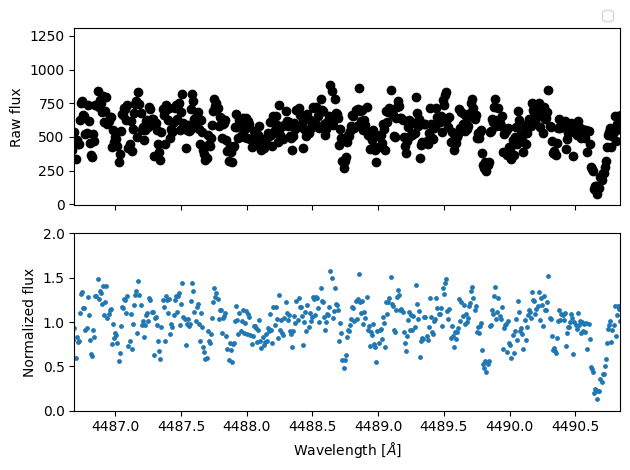

In [12]:
import matplotlib.pyplot as plt

from ASTRA.Instruments import ESPRESSO
from ASTRA.utils import choices

frame = ESPRESSO(file_path="/home/amiguel/spectra_collection/ESPRESSO/proxima/r.ESPRE.2019-07-03T01:43:39.634_S2D_A.fits",
                 user_configs={
                               "NORMALIZE_SPECTRA": True,
                               "NORMALIZATION_MODE": choices.NORMALIZATION_SOURCES.POLY_FIT
                               }
                 )

frame.generate_root_path("tmp")

spectral_order = 50 
wave, flux, err, mask = frame.get_data_from_spectral_order(order=spectral_order)

fig, axis = plt.subplots(nrows=2, sharex=True)
axis[0].scatter(wave[~mask], flux[~mask], color="black")

waves_to_interpol = wave[~mask][1000:1500]
frame.normalize_spectra()
wave, flux, err, mask = frame.get_data_from_spectral_order(order=spectral_order)

axis[1].scatter(wave, flux, s=6)
axis[0].legend(ncol=3, loc=4, bbox_to_anchor=(1,1))

for ax in axis:
    
    ax.set_xlim([waves_to_interpol[0], waves_to_interpol[-1]])

axis[0].set_ylabel("Raw flux")
axis[1].set_ylabel("Normalized flux")
axis[1].set_xlabel(r"Wavelength $[\AA]$")
axis[1].set_ylim([0, 2])
fig.tight_layout()